🎯 **1. Objetivos**

En este ejercicio, revisaremos los fundamentos de la comprobación de hipótesis estadísticas utilizando Python.

Habilidades que desarrollarás:

✅ Evaluar los supuestos necesarios para aplicar una prueba estadística durante la etapa de exploración de datos.

✅ Realizar una pruebas estadísticas en Python e interpretar los resultados.

**❓ 2 Pregunta de investigación**

Vamos a responder preguntas estadísticas utilizando pruebas de hipótesis en Python:

🧪 **¿Existe una diferencia significativa en los niveles promedio de glucosa antes y después del consumo de azúcar?**

→ Esta pregunta se responde con una prueba t pareada.


📊 **3. El conjunto de datos sobre diabetes**

Este conjunto de datos proviene de un pequeño experimento clínico realizado con 8 pacientes que se sometieron a una prueba de tolerancia a la glucosa.

🧪 **Descripción del experimento**:

A los pacientes se les pidió ayunar durante 8 horas antes del test.

Al ingresar al hospital, se midió su nivel basal de glucosa en sangre (before, en mmol/L).

Luego, bebieron 250 ml de una solución con 100 gramos de glucosa.

Dos horas después, se midió nuevamente el nivel de glucosa (after, en mmol/L).

📋 **Variables en el conjunto de datos:**

- `before`: concentración de glucosa en ayunas (mmol/L)
- `after`: concentración de glucosa 2 horas después de consumir glucosa (mmol/L)
- `patient`: identificador del paciente


🧭 **4. Exploración de datos**

Antes de aplicar pruebas estadísticas, es fundamental explorar los datos y verificar los supuestos que permiten aplicar pruebas paramétricas como la t de Student. En esta sección, vamos a:

Cargar las bibliotecas necesarias en Python.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from scipy.stats import ttest_rel
import numpy as np

Cargar el conjunto de datos desde un enlace web.

In [ ]:
# Cargar el dataset desde el sitio web de PSLS
url = "https://raw.githubusercontent.com/statOmics/PSLSData/main/diabetes.txt"
data = pd.read_csv(url, sep=' ')

In [ ]:
# Ver las primeras filas
data.head()

,before,after,patient
0,4.67,5.44,pat1
1,4.97,5.78,pat2
2,5.11,8.49,pat3
3,5.17,6.71,pat4
4,5.33,10.67,pat5


Visualizar las distribuciones de los niveles de glucosa antes y después de la ingesta de azúcar.

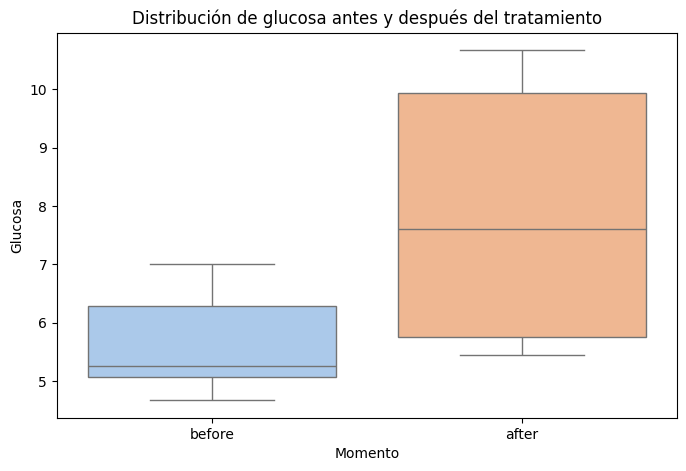

In [ ]:
# Reorganizar los datos para graficarlos fácilmente con Seaborn
data_melted = pd.melt(data, id_vars='patient', value_vars=['before', 'after'],
                      var_name='Momento', value_name='Glucosa')

fig = plt.figure(figsize=(8, 5))
sns.boxplot(data=data_melted, x='Momento', y='Glucosa', hue='Momento', palette='pastel', legend=False)
plt.title('Distribución de glucosa antes y después del tratamiento')
plt.savefig("glucosa_boxplot.pdf")
plt.show()

🔎 **5. Verificación de supuestos para la prueba t pareada**

Antes de aplicar la prueba t pareada, debemos comprobar que las diferencias entre las mediciones `after` y `before` sigan una distribución normal. Esto es un supuesto clave para que la prueba t sea válida.

In [ ]:
#Calculamos la diferencia por paciente entre el nivel de glucosa después y antes:
data['diff'] = data['after'] - data['before']
data[['patient', 'diff']]

,patient,diff
0,pat1,0.77
1,pat2,0.81
2,pat3,3.38
3,pat4,1.54
4,pat5,5.34
5,pat6,-0.55
6,pat7,3.61
7,pat8,2.89


<Figure size 600x600 with 0 Axes>

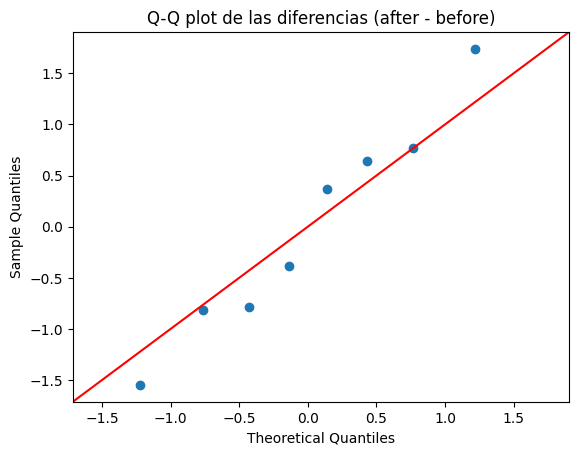

In [ ]:
#Gráfico Q-Q (Quantile-Quantile plot)
fig = plt.figure(figsize=(6,6))
sm.qqplot(data['diff'], line='45', fit=True)
plt.title('Q-Q plot de las diferencias (after - before)')
plt.savefig("diferencias_qqplot.pdf")
plt.show()

📏 **Evaluación de normalidad: prueba de Shapiro-Wilk**

Antes de aplicar una prueba t pareada, debemos comprobar si la variable de interés (la diferencia entre los niveles de glucosa después y antes) se distribuye normalmente. Para esto, usamos la prueba de Shapiro-Wilk.

**Hipótesis estadísticas:**

📌 H₀ (hipótesis nula): la diferencia (after - before) sigue una distribución normal.

📌 H₁ (hipótesis alternativa): la diferencia no sigue una distribución normal.

➡️ Si el p-valor de la prueba es mayor que 0.05, no se rechaza H₀, y podemos asumir normalidad.

➡️ Si el p-valor es menor o igual a 0.05, rechazamos H₀, lo que sugiere que los datos no se distribuyen normalmente.

In [ ]:
#Prueba de normalidad
stat, p_value = stats.shapiro(data['diff'])
print(f'Shapiro-Wilk test: estadístico={stat:.4f}, p-valor={p_value:.4f}')

if p_value > 0.05:
    print("No se rechaza la hipótesis nula: la distribución es aproximadamente normal.")
else:
    print("Se rechaza la hipótesis nula: la distribución no es normal.")

Shapiro-Wilk test: estadístico=0.9688, p-valor=0.8880
No se rechaza la hipótesis nula: la distribución es aproximadamente normal.


🎯 **6 Diferencia entre before y after**

Esta es una comparación pareada, porque las mediciones provienen de los mismos pacientes antes y después del tratamiento.

Hipótesis para la prueba t pareada:

📌 H₀: la media de las diferencias (after - before) es igual a 0.

📌 H₁: la media de las diferencias es distinta de 0.

In [ ]:
stat_t, pval_t = ttest_rel(data['after'], data['before'])
print(f"t pareada: estadístico = {stat_t:.4f}, p-valor = {pval_t:.4f}")

if pval_t < 0.05:
    print("Se rechaza H₀: hay evidencia de una diferencia significativa entre antes y después.")
else:
    print("No se rechaza H₀: no hay evidencia suficiente de una diferencia.")

t pareada: estadístico = 3.2834, p-valor = 0.0134
Se rechaza H₀: hay evidencia de una diferencia significativa entre antes y después.


In [ ]:
# Estadísticas básicas
diff = data['diff']
mean_diff = np.mean(diff)
sem_diff = stats.sem(diff)  # error estándar de la media
ci = stats.t.interval(0.95, df=len(diff)-1, loc=mean_diff, scale=sem_diff)

print(f"Media de las diferencias: {mean_diff:.3f} mmol/L")
print(f"Intervalo de confianza 95%: ({ci[0]:.3f}, {ci[1]:.3f}) mmol/L")

Media de las diferencias: 2.224 mmol/L
Intervalo de confianza 95%: (0.622, 3.825) mmol/L


✅ **Conclusión**

✔️ En promedio, se observa un aumento significativo en el nivel de glucosa en sangre tras administrar 100g de azúcar a los pacientes (p = 0.01).
Los niveles de glucosa dos horas después de la ingesta son, en promedio, 2.2 mmol/L más altos que después de 8 horas de ayuno, con un intervalo de confianza del 95% de [0.6, 3.8] mmol/L.

✔️ Este resultado sugiere que el tratamiento produce un efecto fisiológico evidente y medible sobre la concentración de glucosa en sangre.